BT4012 project 


<h1>EDA <h1>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [43]:
# Load the data and check the first few lines
dataset_path = "emscad_v1.csv" # use your own path

dataset = pd.read_csv(dataset_path)
dataset.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [45]:
dataset.shape

(17880, 18)

## check for missing values and duplicates

In [46]:
#check for duplicate values
number_of_duplicaes = dataset.duplicated().sum()
print('number of duplicated rows is {}'.format(number_of_duplicaes) )

number of duplicated rows is 235


In [47]:
dataset.isna().apply(pd.value_counts)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
False,17880.0,17534,6333,2868,14572,17880.0,15191,10684,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,17880.0,17880.0
True,NaN,346,11547,15012,3308,NaN,2689,7196,NaN,NaN,NaN,3471,7050,8105,4903,6455,NaN,NaN


In [48]:
#Check for number of null values
pd.DataFrame(dataset.isnull().sum()).transpose()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,0,346,11547,15012,3308,0,2689,7196,0,0,0,3471,7050,8105,4903,6455,0,0


from the above information, we can see that 'salary_range' has a large amount of missing data, which is understandable in this context as job postings may not often include salaries as it can be considered sensitive and confidential data. Due to the large amounts of missing data in 'salary_range', we decided to drop this column, as it is difficult to replace the missing data with mean values or perform analysis if we replace the missing data with 0. 

Similarly, 'department' also has a large amount of missing data, which is also understandable in this context as departments are often connoted with the jobs. However, we believe that it can still be useful in our analysis since one characteristic of fraudulent job posting is the inconsistent information in job posting.
 


##  Distribution of features and check for outliers

check for the number of unique values in each feature

In [49]:
pd.DataFrame(dataset.nunique()).transpose()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,11231,3105,1337,874,1710,15095,12119,6510,2,2,2,5,7,13,131,37,2,2


From the above summary, we can see that features 'title', 'description', 'requirements', 'benefits', 'location', 'department', 'salary_range', 'company_profile', 'industry', 'function' have large amounts of unique values. 

In contrast, categorical columns 'employment_type', 'required_experience', 'required_education' have low number of unique values, and can be encoded easily. 

Thus, we decided to explore the distribution of features with respect to the target variables. We chose to visualize the distribution of binary categorical features 'telecommuting', 'has_company_logo', 'has_questions' and categorical features with low dimensionality 'employment_type', 'required_experience' and 'required_education'. 

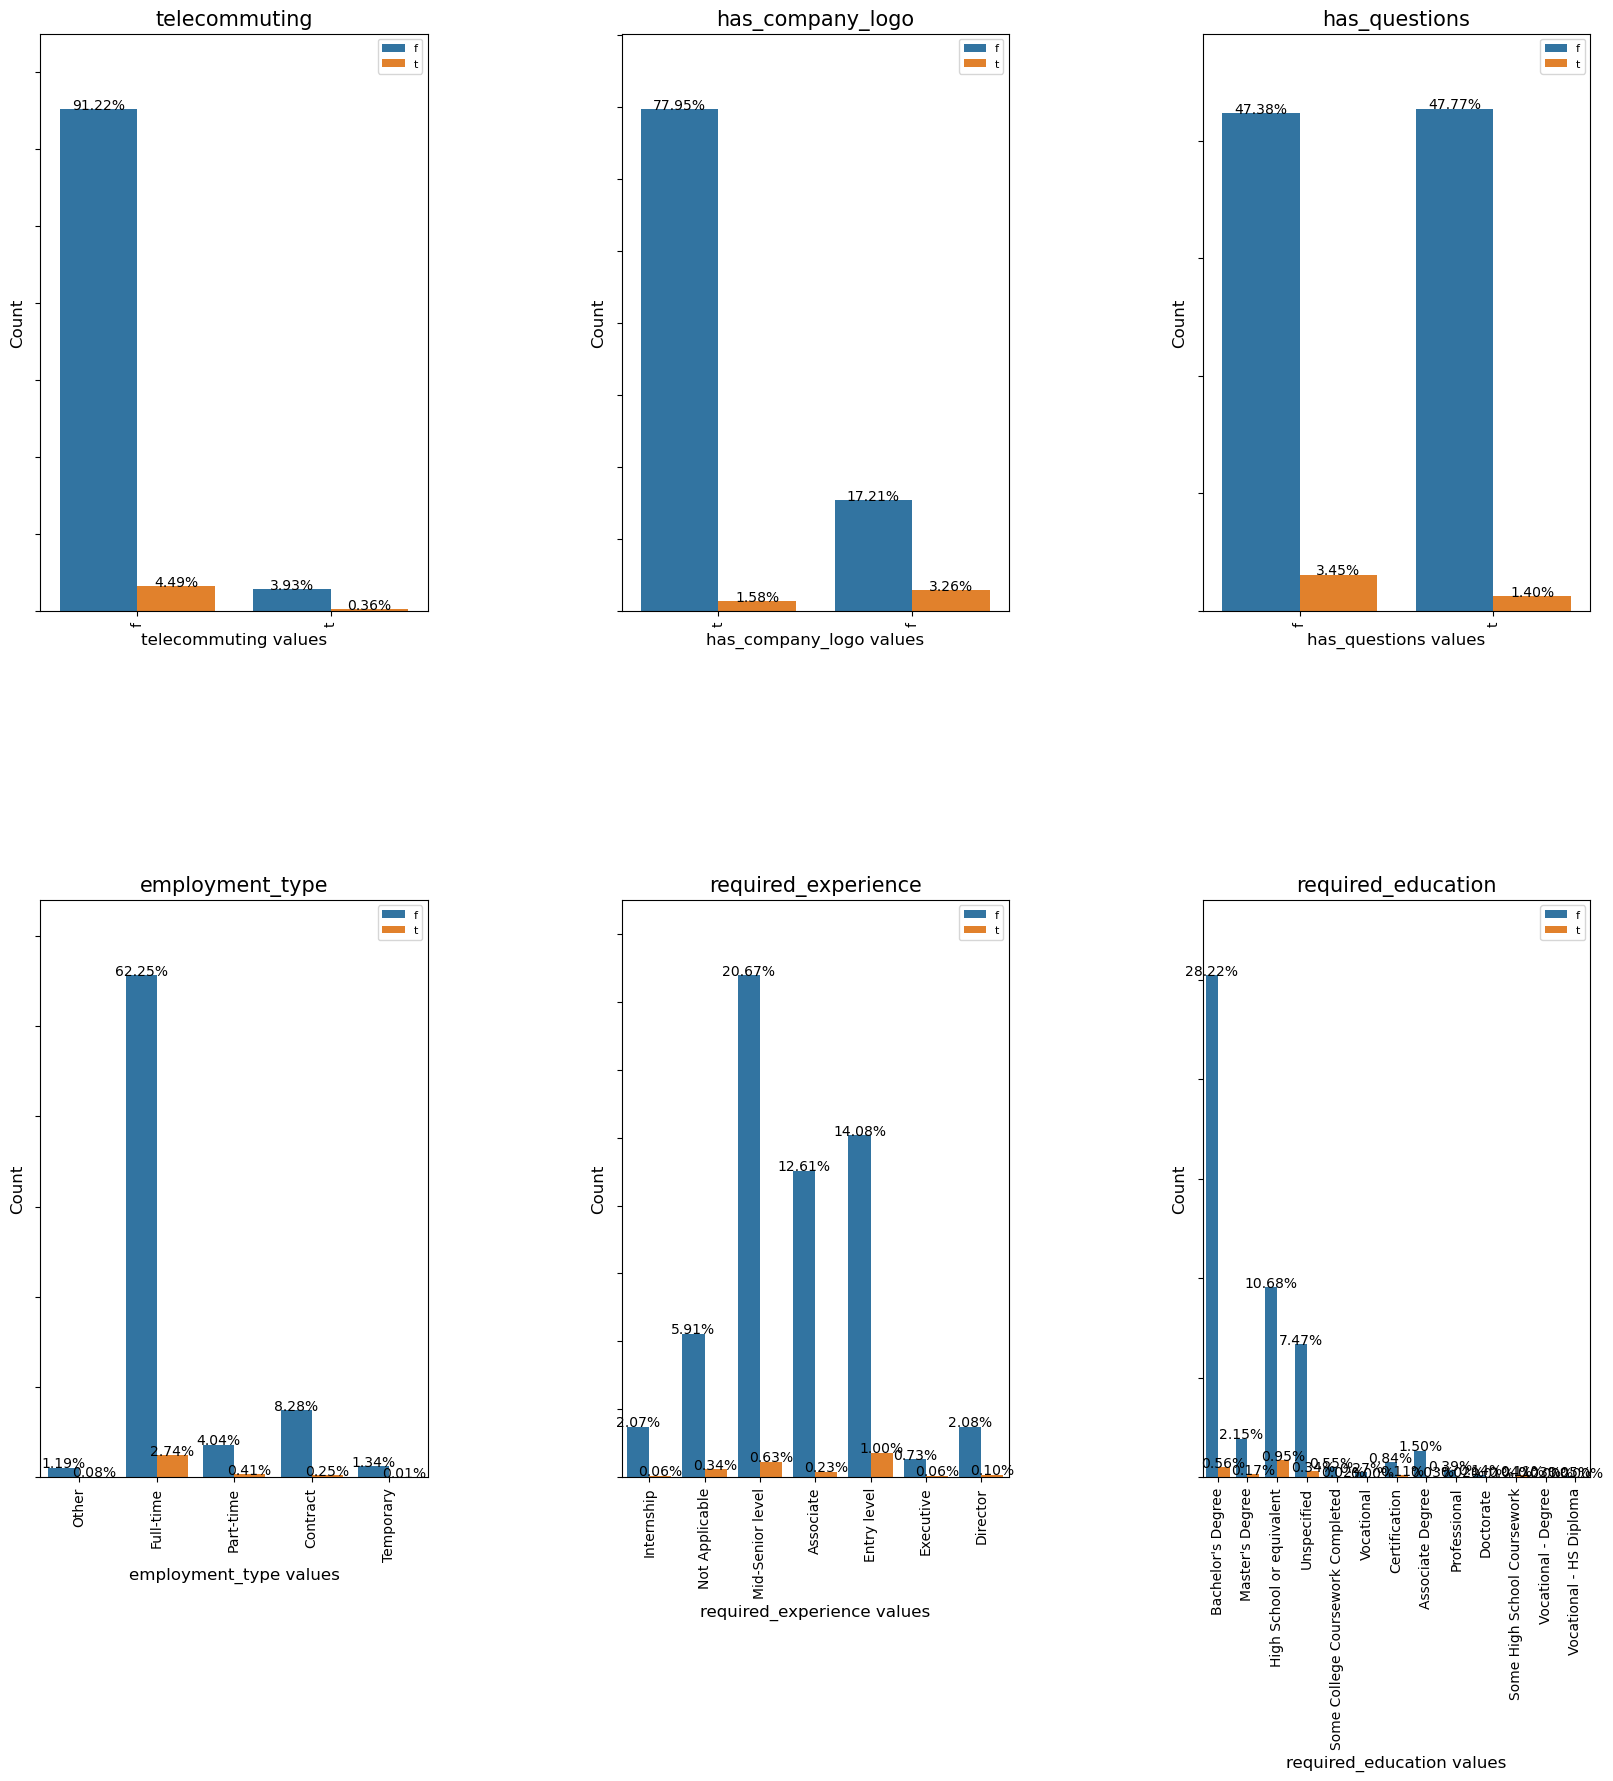

In [50]:

cat_cols = ["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education",]
# visualizating catagorical variable by target
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(20,30)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(dataset[cat_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=dataset, hue='fraudulent') 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col}', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90) 
    total = len(dataset)
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights

plt.show()

<AxesSubplot:>

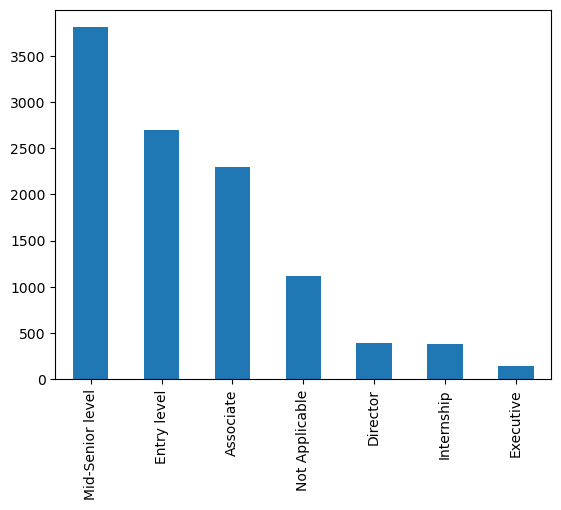

In [59]:
dataset['required_experience'].value_counts().plot(kind = 'bar')


<AxesSubplot:>

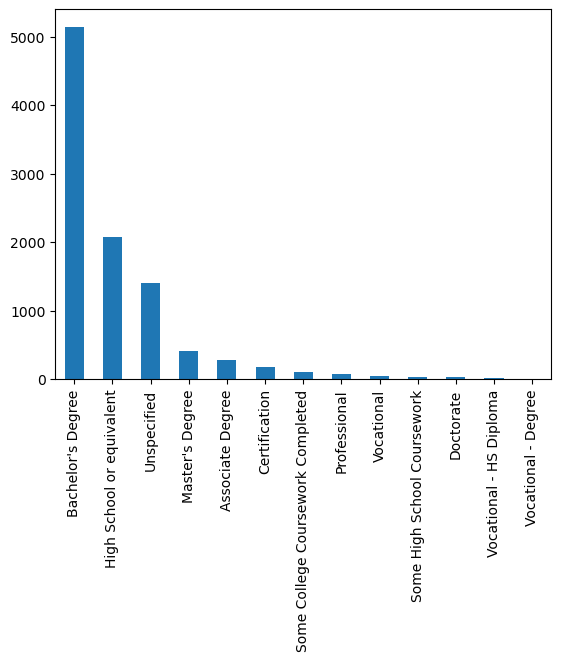

In [60]:
dataset['required_education'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

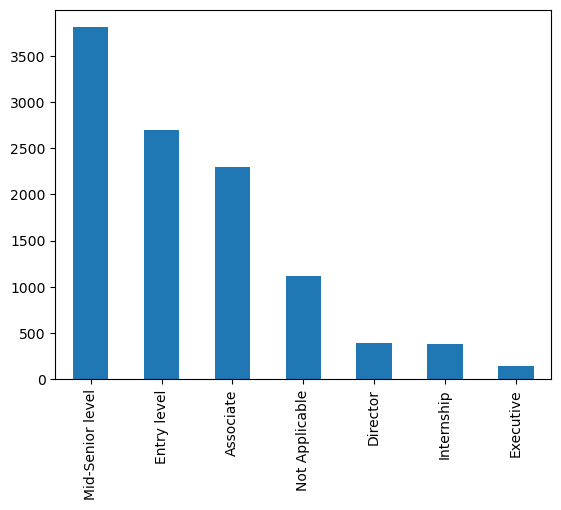

In [61]:
dataset['required_experience'].value_counts().plot(kind = 'bar')

It is rather difficult to eyeball any possible correlation between the features and the target variable. However, we can see that the distribution for fraud and non-fraud classes slightly differ for most of the features with the exception of 'telecommuting'

In [51]:
dataset.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'in_balanced_dataset'],
      dtype='object')

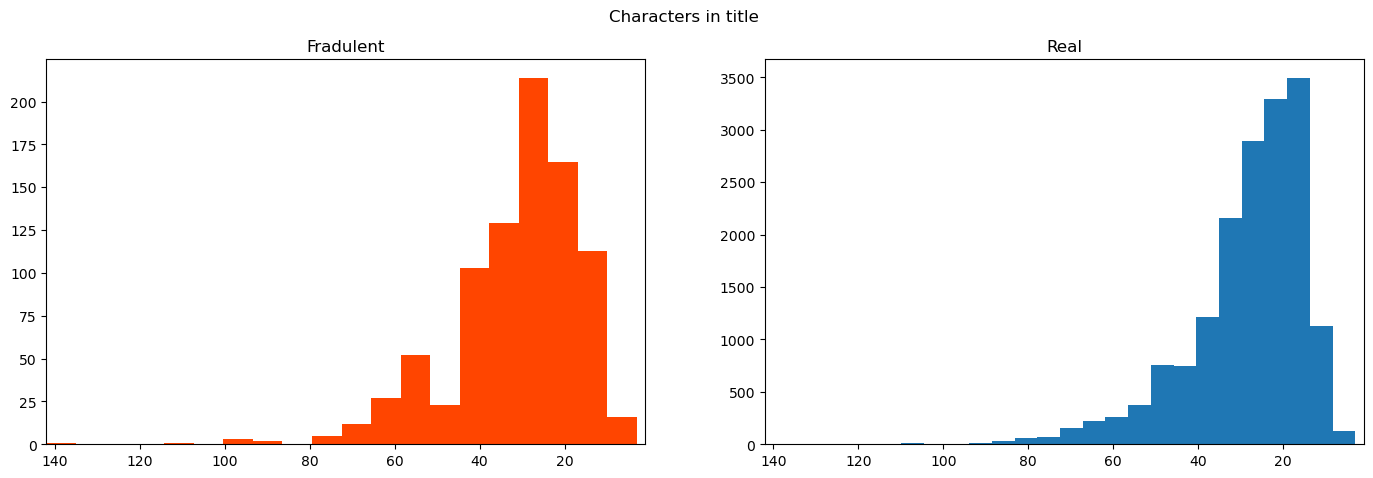

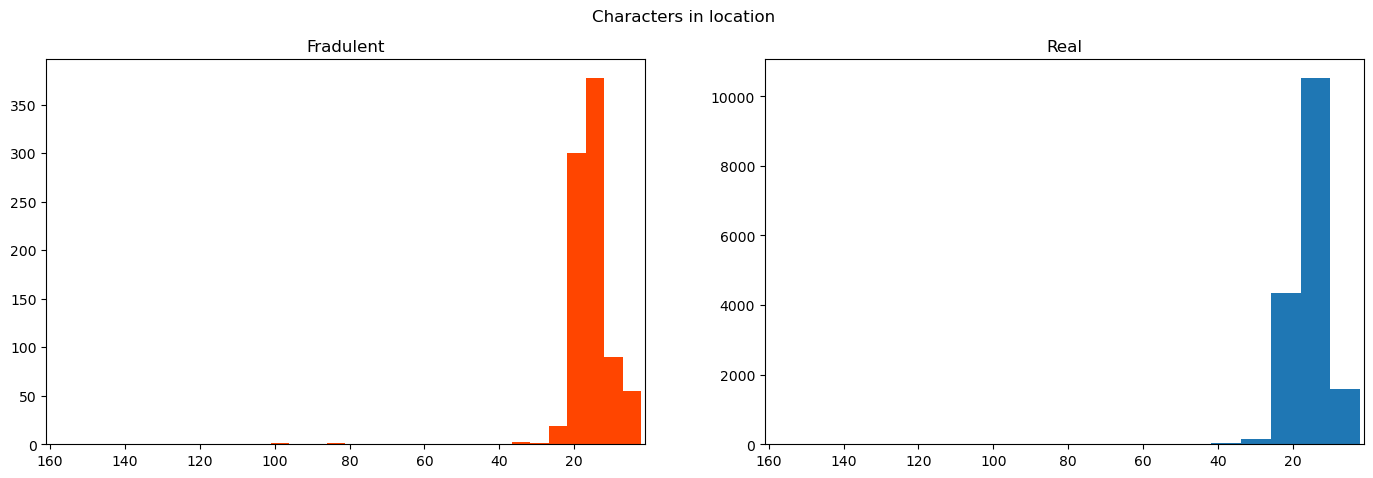

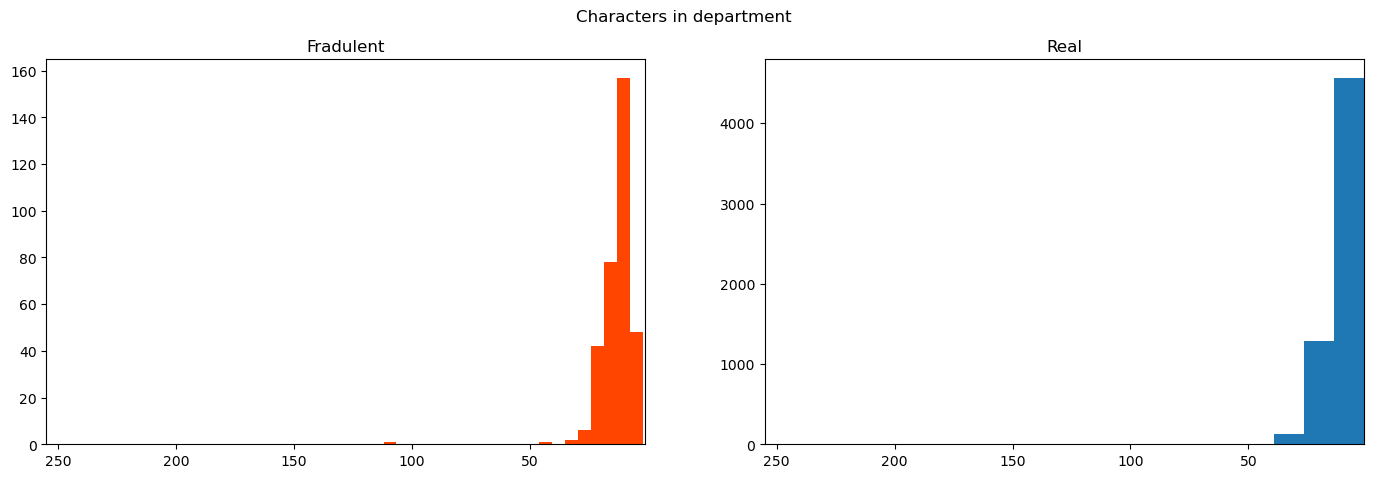

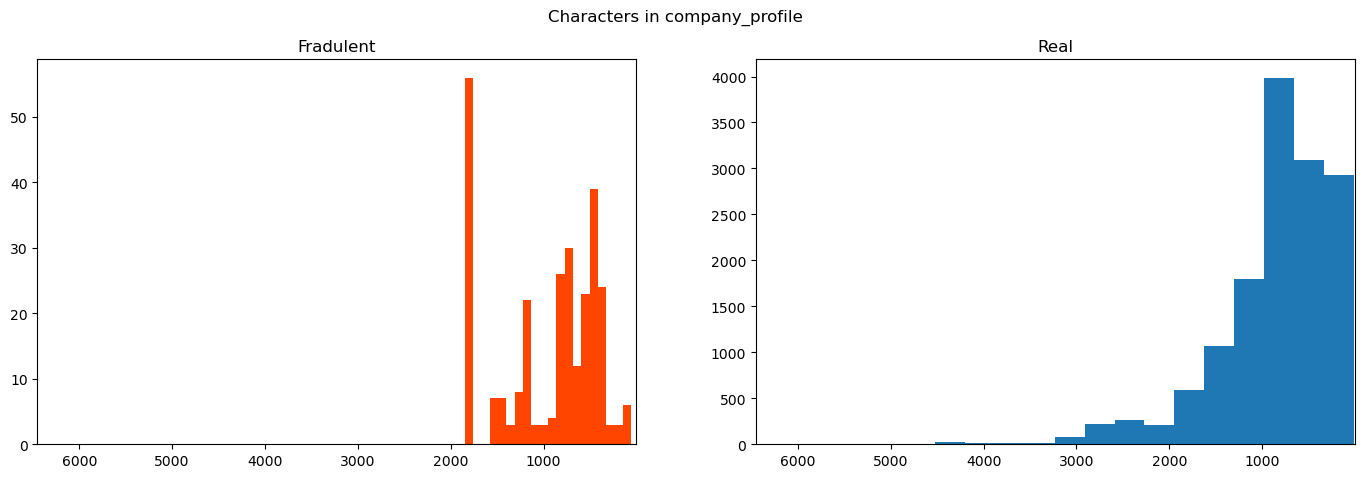

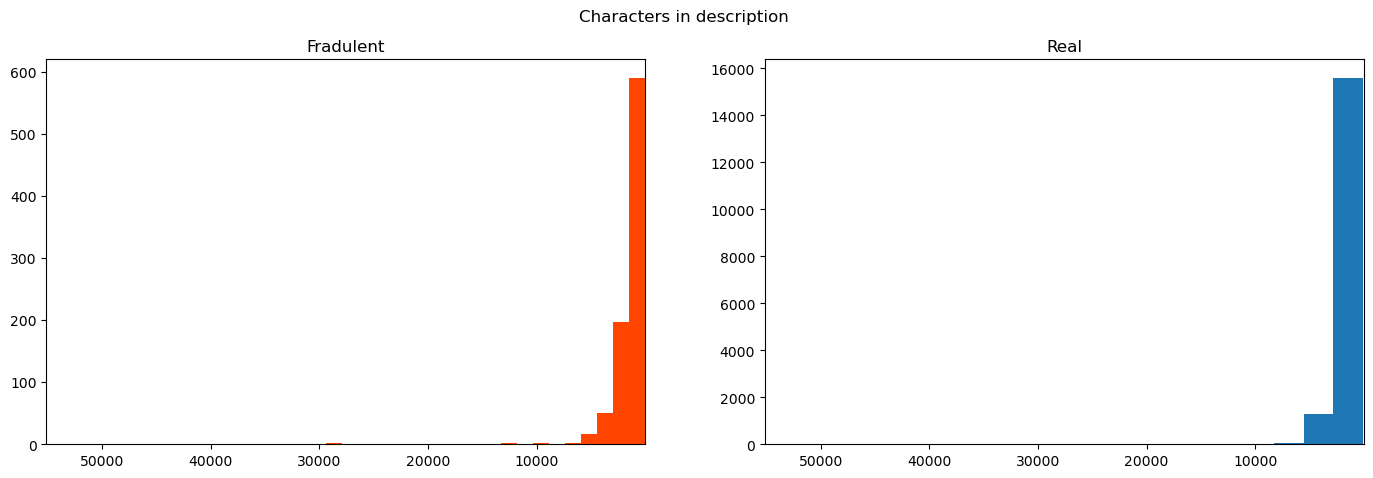

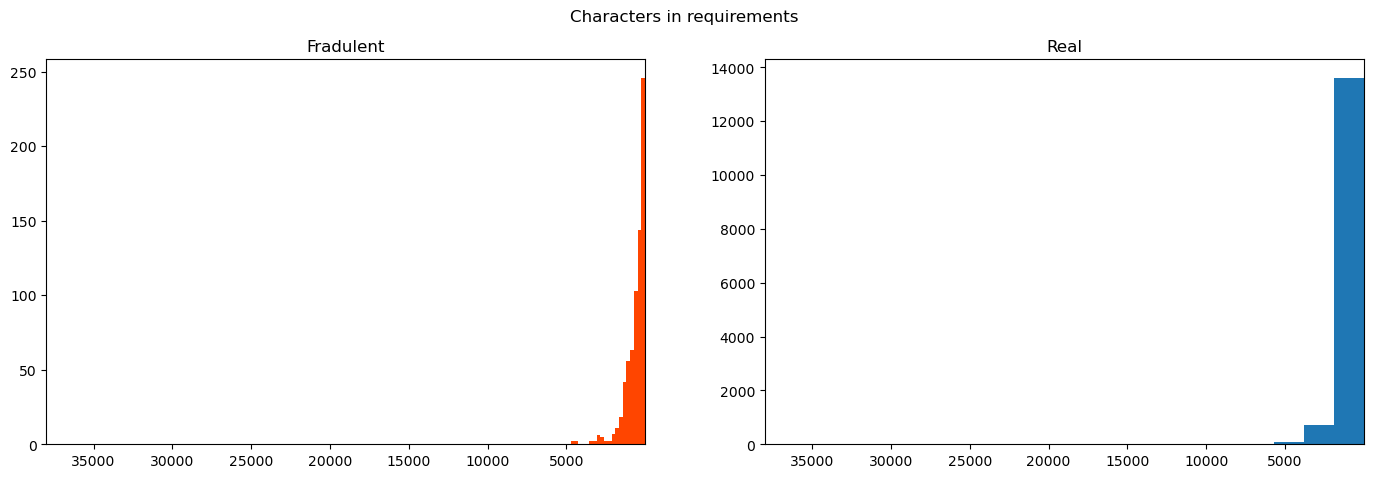

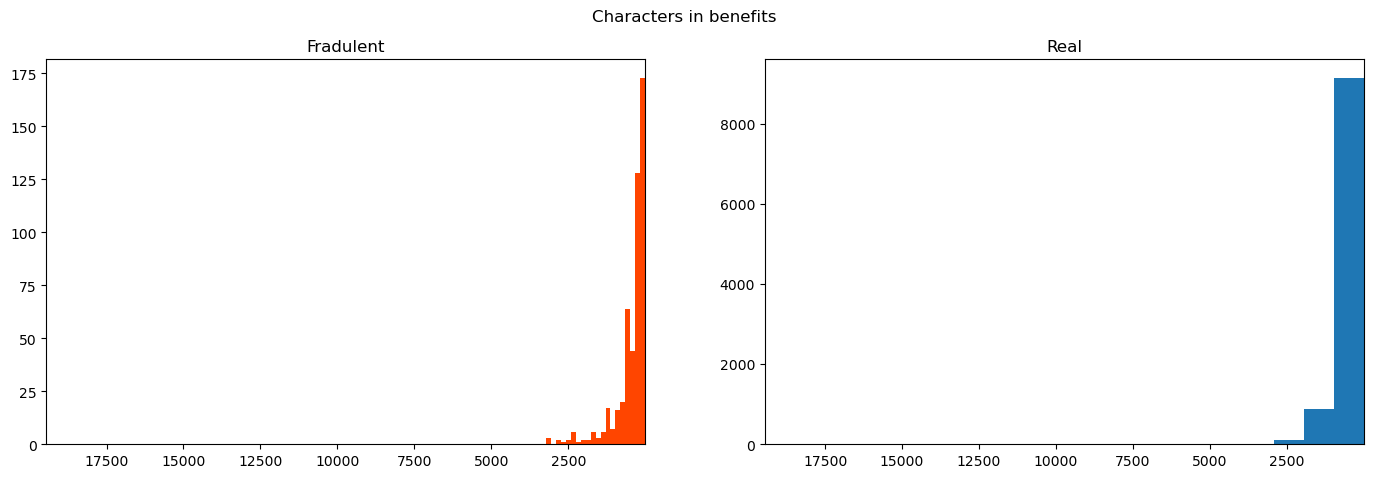

In [52]:
text_Col = ['title', 'location', 'department', 'company_profile',
       'description', 'requirements', 'benefits']
for col in text_Col: 
    fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
    length=dataset[dataset["fraudulent"]== 't'][col].str.len()
    ax1.set_xlim(dataset[col].str.len().max())
    ax1.hist(length,bins = 20,color='orangered')
    ax1.set_title('Fradulent')
    length=dataset[dataset["fraudulent"]=='f'][col].str.len()
    ax2.set_xlim(dataset[col].str.len().max())
    ax2.hist(length, bins = 20)
    ax2.set_title('Real')
    fig.suptitle(str.format('Characters in {}', col))
    plt.show()

<h2> Distribution of target variable<h2>

In [53]:
dataset['fraudulent'].value_counts()

f    17014
t      866
Name: fraudulent, dtype: int64

In [54]:
# your code
fraud_summary = dataset['fraudulent'].value_counts().to_dict()
fraud_summary

ratio = fraud_summary['f'] / (fraud_summary['t'] + fraud_summary['f'])

print("the ratio of non-fraud vs all transaction is: " + str(round(ratio, 3)))

the ratio of non-fraud vs all transaction is: 0.952


In [55]:
fraud_summary

{'f': 17014, 't': 866}

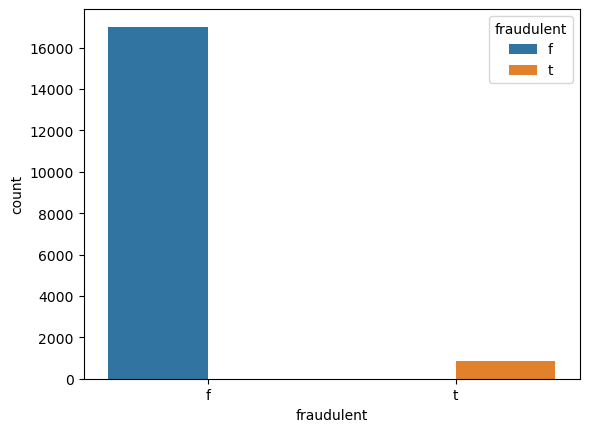

In [56]:
sns.countplot(x = 'fraudulent', hue = 'fraudulent', data = dataset);